In [1]:
import pandas as pd
from functions.interact import *
from data import *

# Environmental Justice 

___
*Estimated Time: ~20 minutes*
___

- Introduction: Environmental Justice in Sociology
- Comparing average AQI in Los Angeles to the rest of California
- Exploring Racial Disparities in Environmental Factors in Los Angeles County
    - Pollution vs Health Outcome
    - Race Groups vs Environmental/ Health Factors [MAP]
    - Race Groups vs Environmental/ Health Factors [PLOT]
- Reflecting on What You Just Learned
- Conclusion

## Introduction: Environmental Justice in Sociology

Environmental justice is a crucial topic in Sociology because it highlights the intersection of social inequality, environmental policy, and public health. It supports the notion that all communities—regardless of race, income, or location—should have access to a clean and healthy environment. However, research and policy discussions have shown that pollution exposure and environmental hazards may not be evenly distributed in some places. Particularly in [LA County](http://www.publichealth.lacounty.gov/eh/about/environmental-justice.htm), low-income neighborhoods and communities of color are often disproportionately affected by hazardous environmenetal conditions, leading to significant health outcomes.

This notebook utilizes a data-driven approach to analyze and visualize environmental justice issues in Los Angeles County. Using statistical analysis, visualization, and geospatial data, we will explore how environmental hazards and health burdens vary across different racial groups. This analysis is essential for identifying systemic inequalities in environmental hazards exposure and can help guide effective policy interventions.

First, we will explore a portion of the case study derived from [Kaggle](https://www.kaggle.com/code/yakhyojon/air-quality-statistical-and-hypothesis-testing/notebook) which observes the average AQI variation across different states where Ripple Renewable Energy operates. The Air Quality Index (AQI) is the Environmental Protection Agency's index for reporting air quality. A value close to 0 signals little to no public health concern, while higher values are associated with increased risk to public health. To learn more about the study, feel free to visit the website linked above. 

**Please run the cells below to extract the data and calculate the average AQI for each listed State.**

In [2]:
aqi_data = pd.read_csv("data/c4_epa_air_quality.csv")  

In [3]:
states = ['California','Florida','Michigan','Ohio','Pennsylvania','Texas']
aqi_states = aqi_data[aqi_data['state_name'].isin(states)]
aqi_states.groupby(['state_name']).agg({"aqi":"mean","state_name":"count"}).rename(columns={"aqi":"mean aqi", "state_name": "obvservations"})

,mean aqi,obvservations
state_name,,
California,12.121212,66
Florida,5.500000,12
Michigan,8.111111,9
Ohio,3.333333,12
Pennsylvania,2.900000,10
Texas,2.700000,10


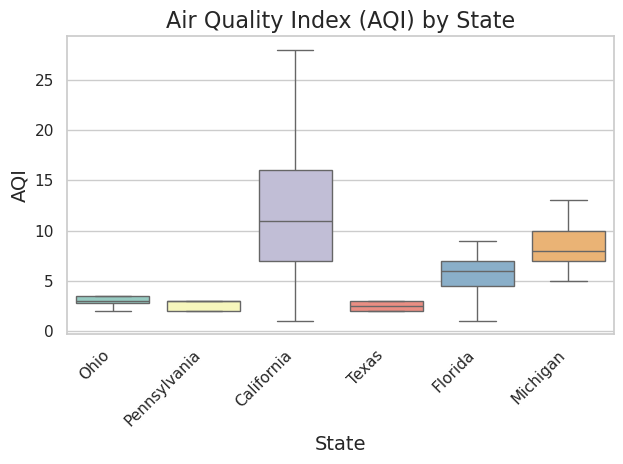

In [4]:
show_plot(aqi_states, 'state_name', 'aqi')

In [5]:
# Run this cell to answer the question
q_1()

## Comparing average AQI in Los Angeles to the rest of California

Let's explore air quality in Los Angeles. For now, we want to know if mean AQI in Los Angeles County is statistically different from the rest of California. Below we will be conducting hypothesis testing. Follow along to understand the process of using statistics to make data inference.

In [5]:
ca_la = aqi_data[aqi_data['county_name']=='Los Angeles']
ca_other = aqi_data[(aqi_data['state_name']=='California') & (aqi_data['county_name']!='Los Angeles')]

### STEP 1: Formulating hypothesis

**How it works:** Imagine that you and your friends wonder if drinking boba regularly affects your GPA. To test this, you set up two competing ideas: the null hypothesis (H₀), which assumes that drinking boba has no effect on GPA, and the alternative hypothesis (H₁), which suggests that drinking boba lowers GPA. Next, you collect data by surveying students about how often they drink boba and their GPA. To measure whether the difference is meaningful, you set a significance level (usually 0.05, or 5%), meaning you’re okay with a 5% chance of being wrong if you claim there’s a real effect. Then, you run a statistical test, like a t-test, to compare the GPAs of boba drinkers and non-drinkers. This test gives you a p-value, which tells you how likely it is to see a difference in GPA just by random chance. If the p-value is small (≤ 0.05), you reject the null hypothesis and conclude that drinking boba likely lowers GPA. If the p-value is large (> 0.05), you fail to reject the null hypothesis, meaning there isn’t enough evidence to say boba drinking affects GPA.
    
In general, a hypothesis reframes the objective of a study as a statement, e.g., if the objective of an investigation is to determine if a food coloring is safe, the resulting null hypothesis might be “the food coloring is not safe”, or alternatively that “the food coloring is safe”

We usually run hypothesis testing in terms of population distribution so as to determine whether our observation is only due to chance and that there really is no enough evidence to support our claim. Or, that we have strong evidence to support that it really is the case with very high confidence.

Our null and alternative hypothesis are as follows:
- $H_0$: There is no difference in the mean AQI between Los Angeles County and the rest of California
- $H_A$: There is a difference in the mean AQI between Los Angeles County and the rest of California

Significance level ($\alpha$): 5% 

### STEP 2: Determining what type of test to use

Since we are comparing the sample means between two independent samples, we will use a two-sample t-test. For more information on statistical tests, 
[Scribbr](https://www.scribbr.com/statistics/statistical-tests/) breaks it down in more detail. Scroll down to the bottom to find the test flow chart.

### STEP 3: Computing the p value

A **p-value** helps us determine whether a result is meaningful or just due to chance. It tells us how likely it is to see our data (or something more extreme) if there was actually no real difference (the null hypothesis is true).
- Small p-value (≤ 0.05): Unlikely to be just chance → Evidence of a real difference → We reject the null hypothesis.
- Large p-value (> 0.05): Could easily happen by chance → Not enough evidence of a real difference → We fail to reject the null hypothesis.

In [6]:
stats_result = stats.ttest_ind(a=ca_la['aqi'], b=ca_other['aqi'], equal_var=False)
print(f"p-value: {stats_result.pvalue}")

p-value: 0.049839056842410995


#### Insight:

- p-value: 0.049 (less than 0.05)
- we reject the null hypothesis in favor of alternative hypothesis

#### Interpretation:
**There is significant statistical evidence that there is a difference in the mean AQI between Los Angeles County and the rest of California.** This makes sense due to Los Angeles being substantially more densely populated than the rest of California. Now let's explore racial factors and whether the distribution is fair across the county. That is, are certain groups more likely to live in areas with higher AQI.



## Exploring the Intersection between Racial Disparities and Environmental/ Health Factors in Los Angeles County

Now that we have significant evidence supporting environmental conditions in LA County, we will further analyze how these conditions affect different racial groups. As you run the cells below, aim to use critical thinking skills to assess why certain groups are likely to be exposed to hazardous environmental and health conditions than others. The *chicken vs egg* discussion highlights the proximity of minorities to hazardous sites in urbanized areas. Are minority groups more likely to move in to these areas due to lower costs? Or are toxic sites systematically placed in areas with more minority population?

### Study Area: Los Angeles County

In [7]:
# our study area is encased within the red bounds 
showLAmap()

### DATA

According to the [Office of Environmental Health Hazard Assessment](https://oehha.ca.gov/), CalEnviroscreen 4.0 was designed to help CalEPA identify disadvantaged communities. SB 535 calls for CalEPA to identify disadvantaged communities based on geographic, socioeconomic, public health and environmental hazard criteria. 

**We acquired data from [CalEnviroScreen](https://oehha.ca.gov/calenviroscreen/maps-data) for 2021.** Each point in the map corresponds to information on a census tract level. A census tract is a small, relatively permanent geographic area, a subdivision of a county, used by the U.S. Census Bureau to collect and present census data, often roughly corresponding to a neighborhood. Running the cell below will clean up the data 
and exract the most relevant features for our case study such as:

- Census Tract
- Population
- PM2.5
- Cleanup Sites
- Haz. Waste
- Pollution Burden
- Asthma
- Cardiovascular Disease
- Traffic
- Hispanic (%)
- White (%)
- African American (%)
- Asian American (%)

In [8]:
path= "data/calenviroscreen40resultsdatadictionary_F_2021.xlsx"
enviro_data = clean_enviro_data(path)

You just cleaned the data! Please do not run me multiple times.


**Feel free to explore the data by uncommenting the cell below.**

In [9]:
#enviro_data

### Pollution vs Health Outcome

After running the cell below, you will be shown a map that visualizes the relationship between pollution burden and health outcomes in Los Angeles County. 

In [10]:
create_pollution_map(enviro_data)  

### Race Groups versus Environmental and Health Factors [MAP]

Below you will interact with a map that displays how different factors vary across different racial groups in Los Angeles County. For example, by selecting a pollution factor (such as PM2.5 or hazardous waste) and two racial groups, you might get see that certain groups are more exposed to certain conditions.

Note: Each circle marker represents a census tract
- Larger circles indicate a greater disparity between the two groups, while smaller circles suggest more similar population proportions in that area. This allows you to see where racial demographic differences are most pronounced in relation to environmental factors like pollution burden, hazardous waste, or air quality.
- Color intensity reflects pollution levels, helping identify areas with higher environmental burdens. 

Use the dropdowns to compare different factors and groups, gaining insights into racial disparities in pollution exposure.

In [11]:
interactive_pollution_map(enviro_data) 

Dropdown(description='Factor:', index=1, options=('PM2.5', 'Pollution Burden', 'Cleanup Sites', 'Haz. Waste', …

Dropdown(description='Group 1:', options=('Hispanic (%)', 'White (%)', 'African American (%)', 'Asian American…

Dropdown(description='Group 2:', index=1, options=('Hispanic (%)', 'White (%)', 'African American (%)', 'Asian…

Button(button_style='primary', description='Update Map', style=ButtonStyle())

Output()

### Race Groups versus Environmental and Health Factors [PLOT]

Below is a scatter plot that compares environmental/health factors and racial demographics in Los Angeles County. Each point represents a census tract, with purple for Group 1 and orange for Group 2. 

In [12]:
interactive_scatter_plot(enviro_data) 

Dropdown(description='Hazard Factor:', options=('Pollution Burden', 'Cleanup Sites', 'Haz. Waste', 'Asthma', '…

Dropdown(description='Group 1:', options=('Hispanic (%)', 'White (%)', 'African American (%)', 'Asian American…

Dropdown(description='Group 2:', index=1, options=('Hispanic (%)', 'White (%)', 'African American (%)', 'Asian…

Button(button_style='primary', description='Update Plot', style=ButtonStyle())

Output()

## Reflecting on What You Just Learned

The interactive maps/ plots above show some disparities in pollution exposure and health outcomes among racial groups in Los Angeles County. Minority communities face higher pollution burdens and increased rates of asthma and cardiovascular disease, raising the chicken-or-egg question in environmental justice: Did toxic sites attract marginalized communities due to housing policies, or were they placed there due to weaker resistance? This creates a reinforcing cycle, where chronic pollution exposure worsens health and economic mobility. The findings highlight systemic inequalities but also raise questions: What policies have shaped these patterns, and how can interventions break this cycle? **Run the cell below.**

In [13]:
q_5()

## Conclusion

This notebook highlights environmental inequalities in Los Angeles County, showing how pollution and health risks disproportionately affect marginalized communities. By combining statistical analysis and mapping, we reveal patterns of pollution burden and racial disparities. While data helps quantify these issues, addressing environmental justice requires policy action and community involvement to create lasting change.

Congratulations! You made it to the end.

### Run the cell below to check your answers

In [14]:
grader = otter.Notebook()
run_tests()

Running tests...

✅ Q1: Answer recorded for manual grading.
✅ Q2: Answer recorded for manual grading.
✅ Q3: Answer recorded for manual grading.
✅ Q4: Answer recorded for manual grading.
✅ Q5: Answer recorded for manual grading.


All tests completed. Great work!
